In [14]:
import os 
import sys

from matplotlib import pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('../../')
import config

# AIS train data

In [27]:
data = pd.read_csv(os.path.join(config.DATA_DIR, '01-ais/01-data.csv'), parse_dates = ['time'])

In [28]:
data

,time,cog,sog,rot,heading,navstat,latitude,longitude,vesselId,portId,eta_hours
0,2024-01-01 00:00:25,284.0,0.7,0.0,88.0,Under way using engine,-34.74370,-57.85130,61e9f3a8b937134a3c4bfdf7,61d371c43aeaecc07011a37f,214.993056
1,2024-01-01 00:00:36,109.6,0.0,-6.0,347.0,At anchor,8.89440,-79.47939,61e9f3d4b937134a3c4bff1f,634c4de270937fc01c3a7689,8731.990000
2,2024-01-01 00:01:45,111.0,11.0,0.0,112.0,Under way using engine,39.19065,-76.47567,61e9f436b937134a3c4c0131,61d3847bb7b7526e1adf3d19,32.970833
3,2024-01-01 00:03:11,96.4,0.0,0.0,142.0,At anchor,-34.41189,151.02067,61e9f3b4b937134a3c4bfe77,61d36f770a1807568ff9a126,8779.946944
4,2024-01-01 00:03:51,214.0,19.7,0.0,215.0,Under way using engine,35.88379,-5.91636,61e9f41bb937134a3c4c0087,634c4de270937fc01c3a74f3,587.935833
...,...,...,...,...,...,...,...,...,...,...,...
1522059,2024-05-07 23:59:07,359.1,13.4,0.0,1.0,Under way using engine,52.19131,-5.82223,clh6aqawa0002gh0zypfa5dut,634c4de270937fc01c3a7417,5.014722
1522060,2024-05-07 23:59:08,12.3,17.1,0.0,13.0,Under way using engine,38.96142,-12.00502,61e9f3aeb937134a3c4bfe43,634c4de270937fc01c3a76a1,51.014444
1522061,2024-05-07 23:59:08,269.8,14.9,-1.0,270.0,Under way using engine,49.71372,-5.22042,61e9f43db937134a3c4c0169,634c4de270937fc01c3a787b,191.014444
1522062,2024-05-07 23:59:08,8.0,18.7,0.0,6.0,Under way using engine,38.27895,10.78280,61e9f469b937134a3c4c029b,61d3781293c6feb83e5eb73b,12.764444


In [48]:
temp_df = data.assign(
    time_transformed=data['time'].dt.strftime('%m-%d-%H-%M')
)
temp_df.duplicated(subset=['time_transformed', 'vesselId'], keep=False).sum()

np.int64(764)

<Axes: >

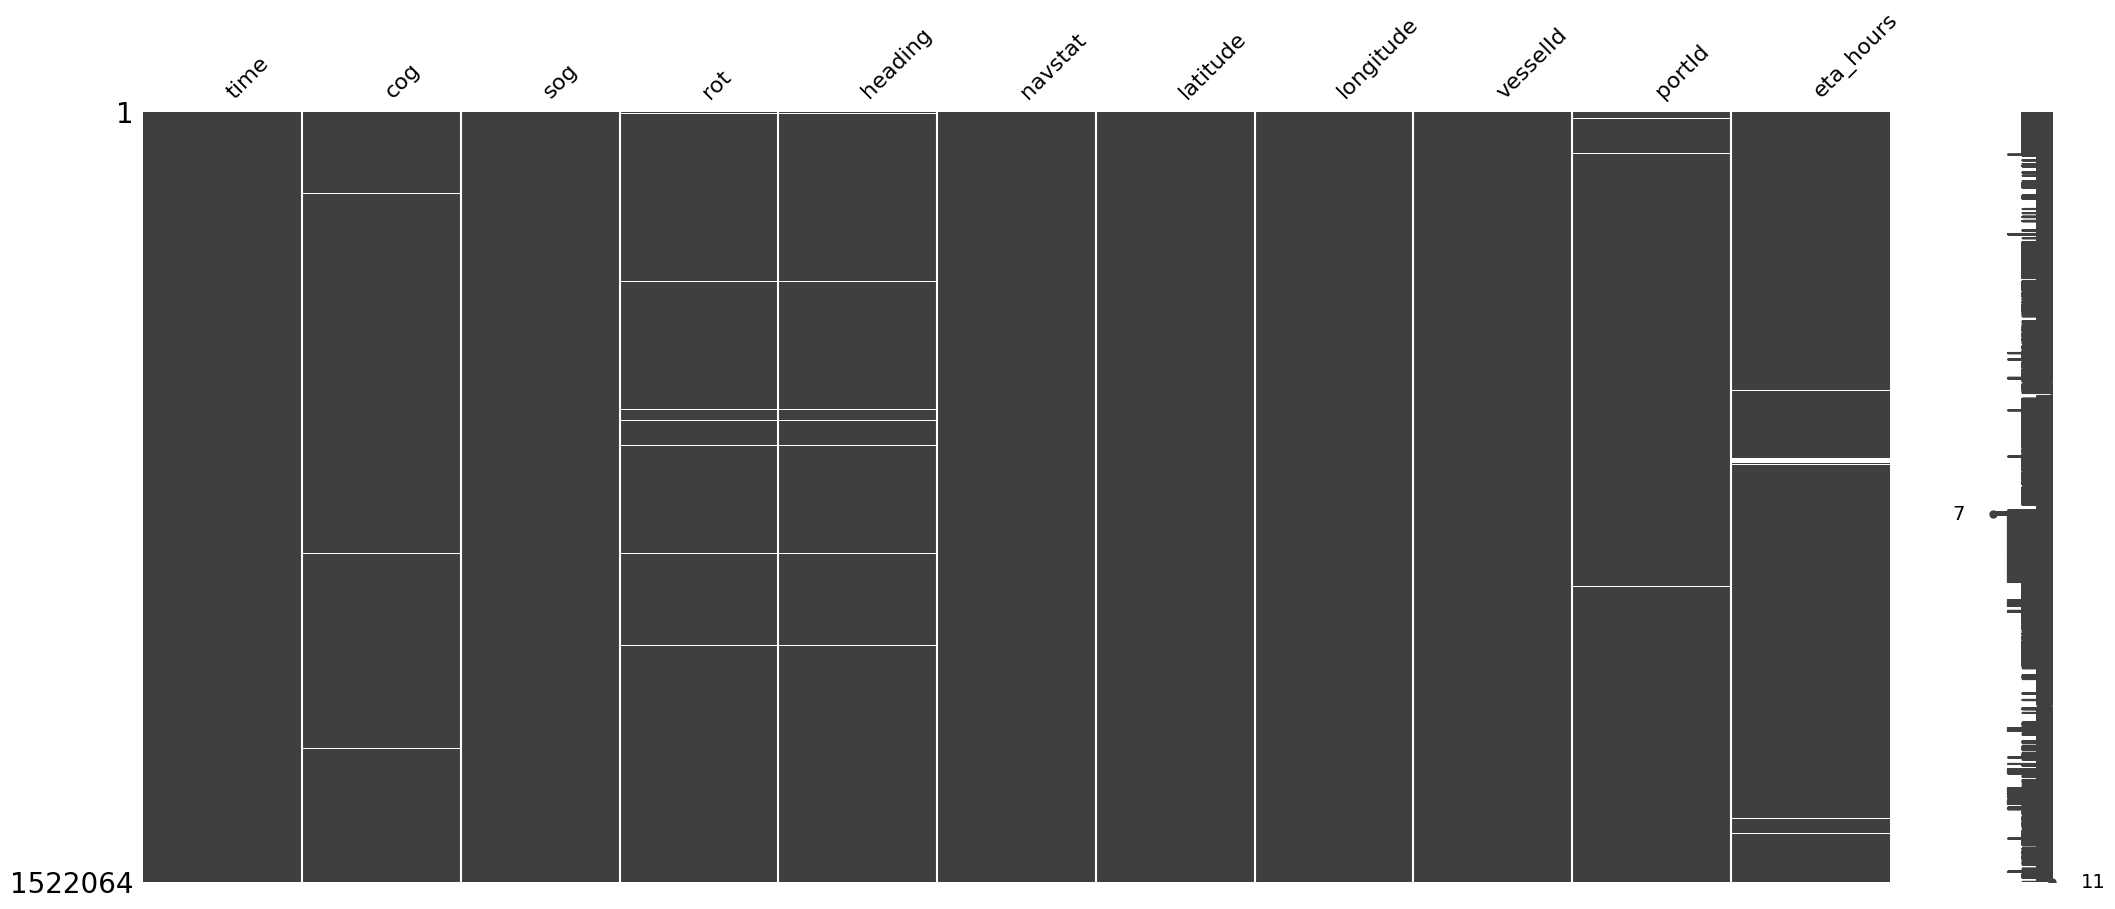

In [7]:
msno.matrix(data)

<Axes: >

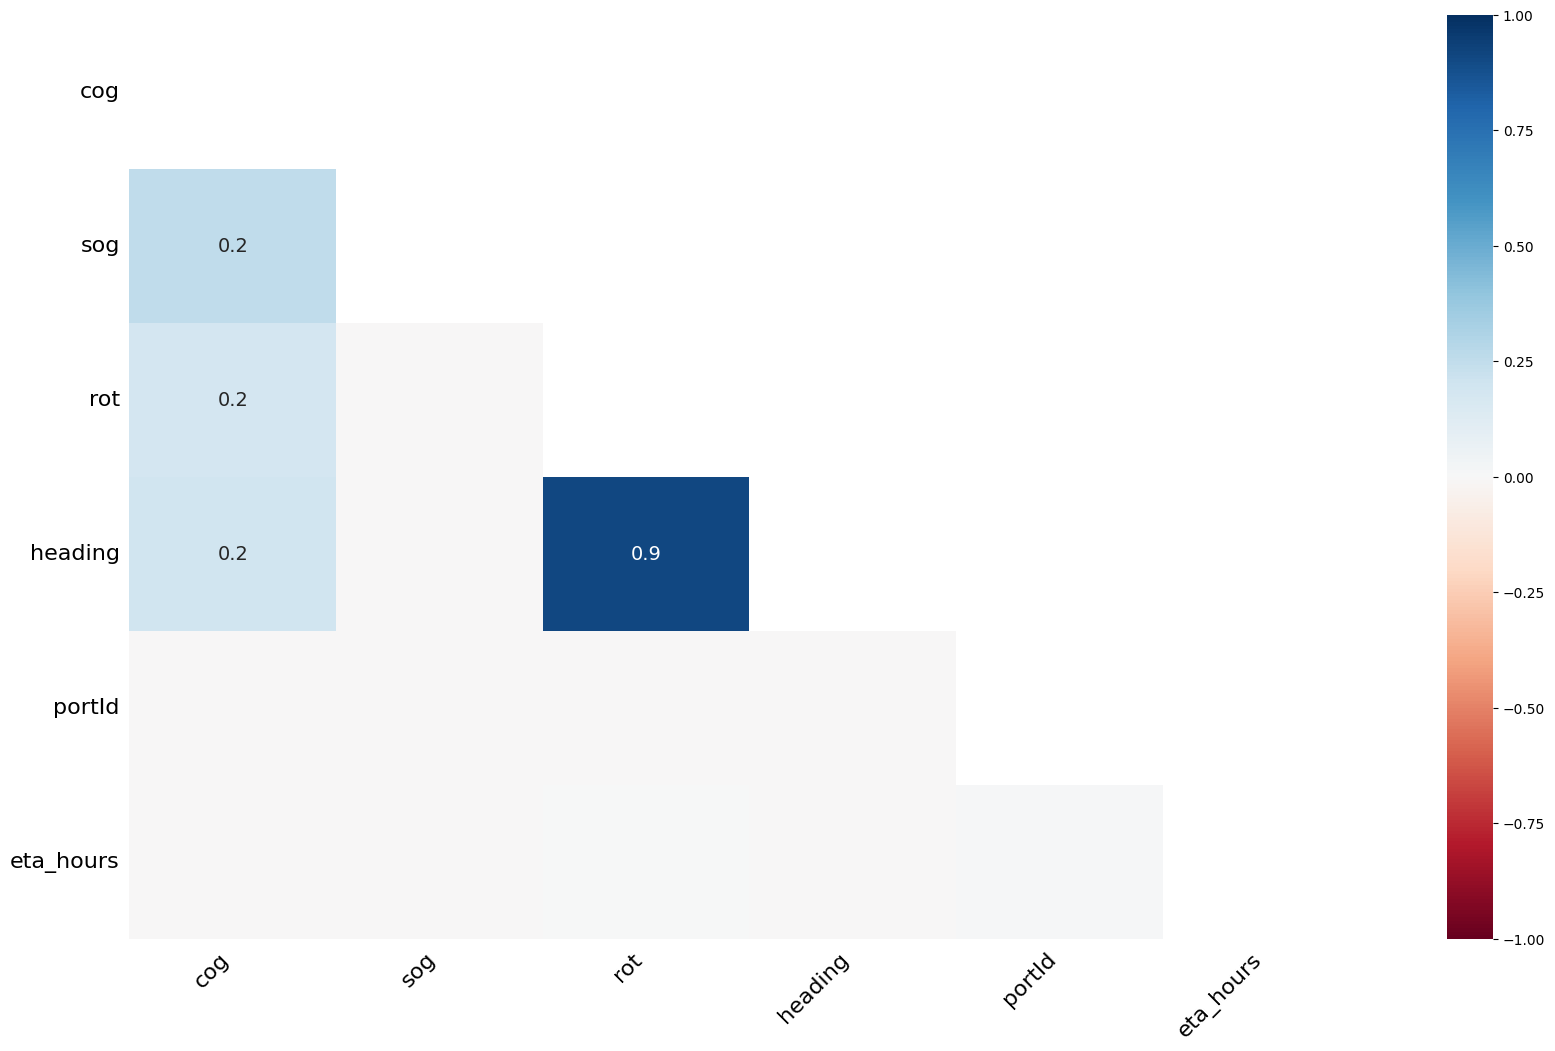

In [8]:
msno.heatmap(data)


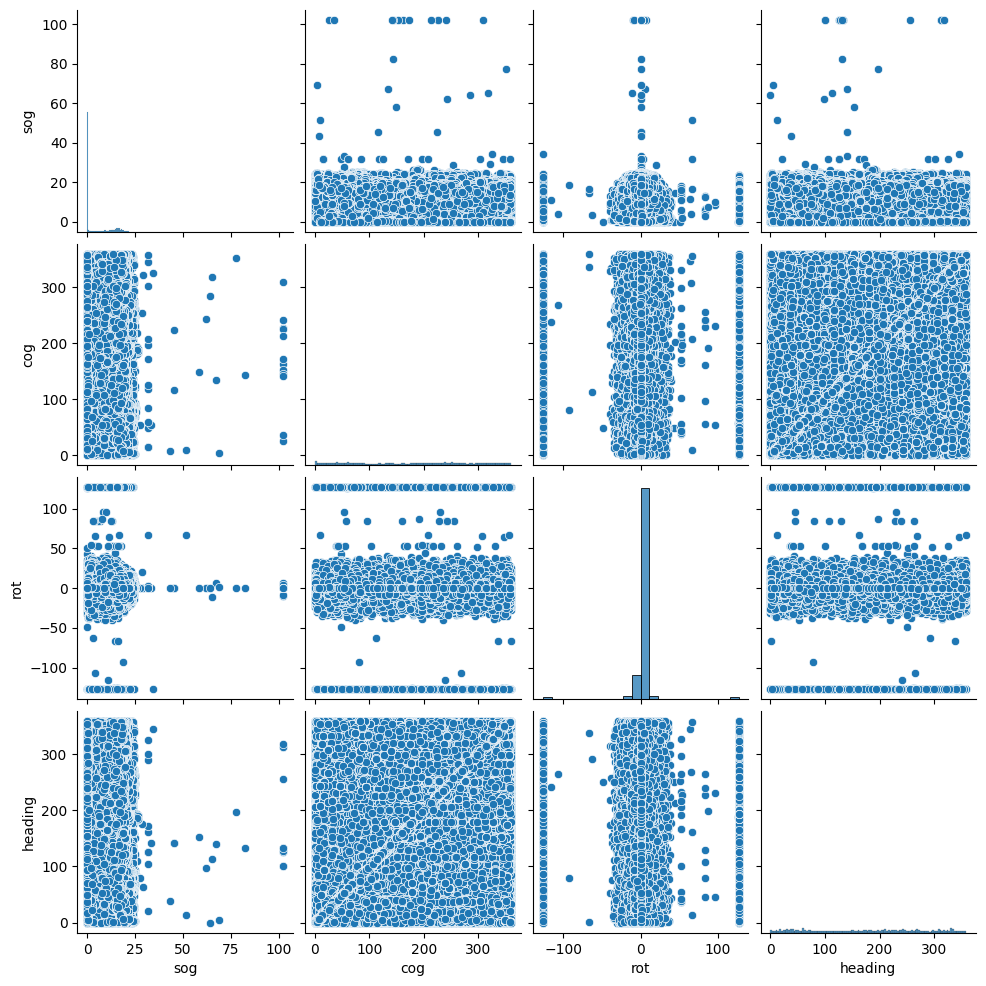

In [10]:
sns.pairplot(data[['sog', 'cog', 'rot', 'heading']])
plt.show()


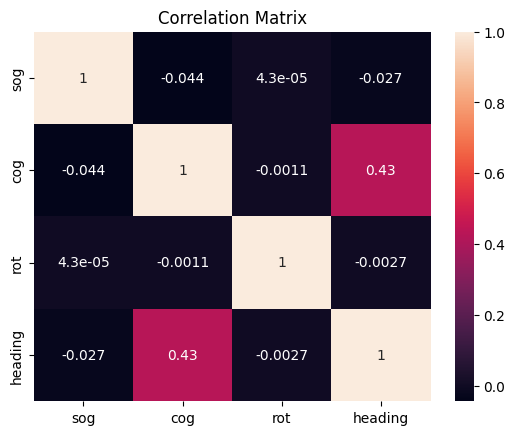

In [12]:
corr_matrix = data[['sog', 'cog', 'rot', 'heading']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()
